# Homework 1
## Ahmet Buğra Taksuk - 2017402168
- In this homework, we are asked to investigate the dimensionality and sample size effects on a dataset and also to do some manipulations on images. 
- In the first part, I defined functions to generate uniformly random numbers with different dimensions and sizes. After generation, I performed some operations like counting the numbers to find the fraction of points inside a n-sphere inscribing n-cube. To find the distances between the points, I used euclidian distance from scipy library. Using those information, I estimated the number pi. Lastly, I calculated the minimum distances of each point to each point in 100 extra instances and tried to show the curse of dimensionality. 
- In the second part, I performed some manipulations on an image of mine in the size of 512x512 pixels using the matplotlib library. 

In [2]:
# Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from scipy.spatial import distance


## Part - 1

## Task ) A 

### Points Generation

In [3]:
# The function to generate random U(-1,1) points given the size and the dimension of the vector.
# It returns a pandas dataframe object each dimension labeled

def gen_pts(dim,size): 
    d = dim #dimension of points
    columns = list(range(0, dim))
    for i in range(0, len(columns)):
        columns[i] = "D"+ str(i+1)
    pts = []
    for i in range(0,size):
        pts.append(np.random.uniform(low=-1, high = 1, size =d))
    pts = pd.DataFrame(pts, columns = columns)
    return pts

In [4]:
# The function to generate sample of vecors of different sizes and dimensions for to use in the questions. 

def gen_sample(size):
    points = []
    for i in range(1,16):
        points.append(gen_pts(i,size))
    return points
    

### Fraction Calcualation

In [5]:
# THe function to calculate the points inside the n-sphere but not the n-cube. It will later be used to estiamte the value of pi. 
# For each dimension, it finds the distances of each point to the origin and counts them with the variable "counter"  
# For euclidian distance calculation, I used "distance" library from scipy

def get_fracs(size, points):
    fraction = []
    for i in range(0,15):
        counter = 0
        dist = 0
        for j in range(0,size):
            dist = distance.euclidean(points[i].values[j],np.zeros(i+1))
            if(dist<=1):
                counter = counter +1 
        fraction.append(float(counter/size))
    return fraction

In [6]:
# Fractions are calculated for the generated sample 

fractions = get_fracs(1000,gen_sample(1000))

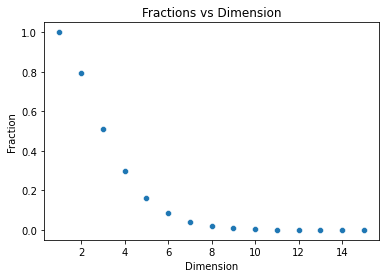

In [7]:
sns.scatterplot(x = list(range(1, 16)) , y = fractions)
plt.title("Fractions vs Dimension");
plt.xlabel("Dimension")
plt.ylabel("Fraction")
plt.show();

- As we can see from the plot, as the dimension increases, the fraction of points are closing to the zero. 

## Task ) B 

- The ratio of area of the circle over the area of square : pi/4
- Therefore the fraction is multiplied with 4

In [29]:
print("Approximation for dimension 2:", fractions[1]*4 ,
      "Real Value", np.pi)

Approximation for dimension 2: 3.132 Real Value 3.141592653589793


- The ratio of volume of the sphere over the volume of cube : pi/6
- Therefore the fraction is multiplied with 6

In [30]:
print("Approximation for dimension 3:", fractions[2]*6 ,
      "Real Value", np.pi)

Approximation for dimension 3: 3.306 Real Value 3.141592653589793


## Task C ) 

In [8]:
#Creating sample at different size to compare the performance of the estimate of the pi
# pi_2d holds the values of the fractions on different sizes of samples as well as pi_3d 

large_sample = [5000,10000, 25000, 50000, 100000]
pi_2d = []
pi_3d = []
for i in large_sample:
    sample = gen_sample(i)
    a = get_fracs(i, sample)
    pi_2d.append(a[1]*4)
    pi_3d.append(a[2]*6)


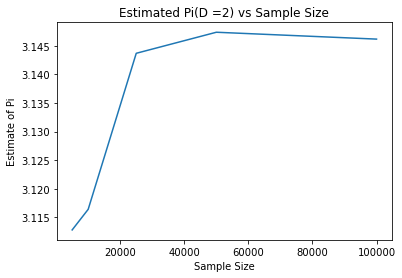

In [10]:
sns.lineplot(x = large_sample, y = pi_2d)
plt.title("Estimated Pi(D =2) vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Estimate of Pi")
plt.show();

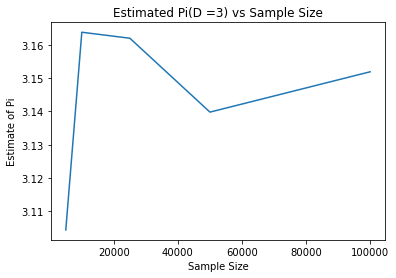

In [33]:
sns.lineplot(x = large_sample, y = pi_3d)
plt.title("Estimated Pi(D =3) vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Estimate of Pi")
plt.show();

- As we can see from the above two charts, as the size of the sample increases, the performance of the estimate increases. 

## Task ) D 

In [12]:
# The function to find the distance between the point in the sample and the point in the instance. 

def min_dist(pt1, arr):
    dist_min = 10000000
    dist = 0
    for i in arr:
        dist = distance.euclidean(pt1,i)
        if(dist<=dist_min):
            dist_min = dist
    return dist_min

In [13]:
# The function to find the nearest neighbour of the point in the sample to the all instances. 
# Returns an array that holds average distances of each dimension

def get_dist(size, dim,  points, instances):
    avg_distances = []
    for i in range(0,dim):
        distances = []
        for j in range(0,size):
            distances.append(min_dist(points.values[j], instances.values))
        avg_distance = np.mean(distances)
        return avg_distance

In [14]:
avg_distances = []
for i in range (1,16):
    a = gen_pts(i,1000)
    b = gen_pts(i,100)
    avg_distances.append(get_dist(1000,1,a,b))

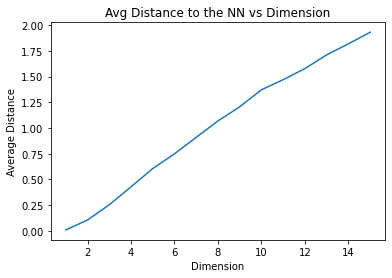

In [15]:
sns.lineplot(x = list(range(1,16)) , y = avg_distances)
plt.title("Avg Distance to the NN vs Dimension")
plt.xlabel("Dimension")
plt.ylabel("Average Distance")
plt.show();

- As we can see from the plot above, as the dimension increases, the minimum distance to the nearest neighbour increases. 

## Task - 2 

### Task ) A 

In [17]:
#Necessary libraries for the image processing 

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

- Read the image using matplotlib and then layered the RGB channels as setting the the other two channel values to the zero except the layer itself .

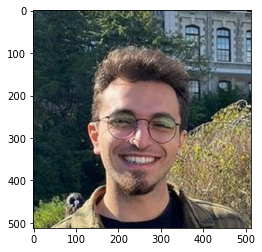

In [18]:
# Reading the image 

image = mpimg.imread('face.jpg')

r = image.copy()
# set green and blue channels to 0
r[:, :, 1] = 0
r[:, :, 2] = 0


g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

b = image.copy()
# set red and green channels to 0
b[:, :, 0] = 0
b[:, :, 1] = 0


plt.imshow(image);

- Structure of the variable

In [127]:
image.dtype

dtype('uint8')

- Shape of the variable that keeps image

In [128]:
image.shape

(512, 512, 3)

### Task ) B

- Blue Image

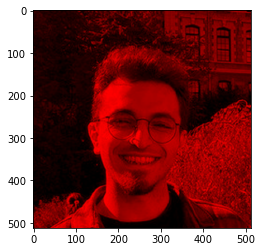

In [129]:
# RGB - Red
plt.imshow(r);

- Green Image

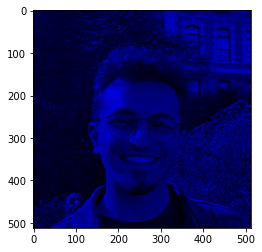

In [130]:
# RGB - Blue
plt.imshow( b);

- Red Image

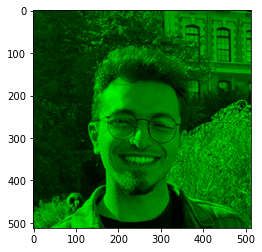

In [131]:
# RGB - Green
plt.imshow( g);

## Task ) C

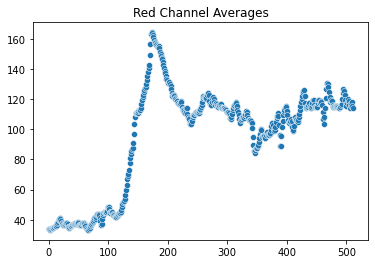

In [132]:
sns.scatterplot(y =r.mean(axis=0)[:,0], x = list(range(0,512)))
plt.title("Red Channel Averages")
plt.show();

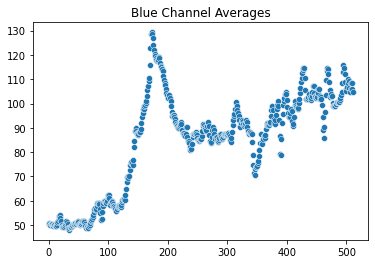

In [133]:
sns.scatterplot(y =b.mean(axis=0)[:,2], x = list(range(0,512)))
plt.title("Blue Channel Averages")
plt.show();

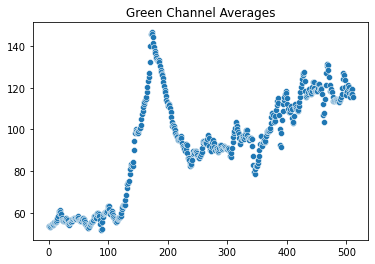

In [134]:
sns.scatterplot(y =g.mean(axis=0)[:,1], x = list(range(0,512)))
plt.title("Green Channel Averages")
plt.show();

## Task ) D

In [41]:
height, width = image.shape[:2]
width_cutoff = width // 2

- For the green channel 

In [42]:
# Substracting the right pixel values of each layer from the left values

new_image = image.copy()
new_image[:, width_cutoff:,2] =  image[:, width_cutoff:,2] -image[:, :width_cutoff:,2]

- For the red channel 

In [43]:
new_image[:, width_cutoff:,0] =  image[:, width_cutoff:,0] -image[:, :width_cutoff:,0]

- For the green channel 

In [44]:
new_image[:, width_cutoff:,1] =  image[:, width_cutoff:,1] -image[:, :width_cutoff:,1]

- Final new image 

- The image represenation after substracting each layers' right values from the left.  

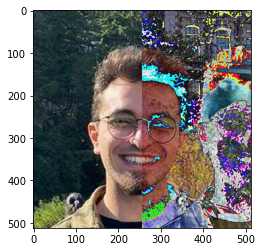

In [45]:
plt.imshow(new_image);

- Splitting the layers after substracting 

In [46]:
r = new_image.copy()
# set green and blue channels to 0
r[:, :, 1] = 0
r[:, :, 2] = 0


g = new_image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

b = new_image.copy()
# set red and green channels to 0
b[:, :, 0] = 0
b[:, :, 1] = 0


- Blue Channel 

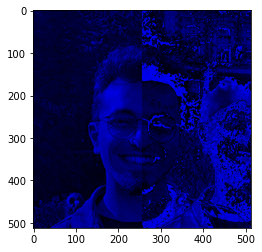

In [47]:
plt.imshow(b);

- Red Channel 

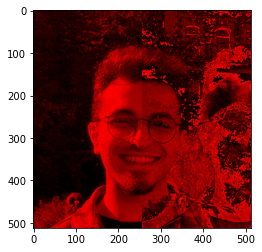

In [48]:
plt.imshow(r);

- Green Channel 

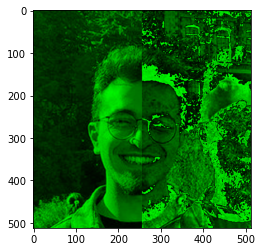

In [49]:
plt.imshow(g);

## Task ) E 

- Original Photo

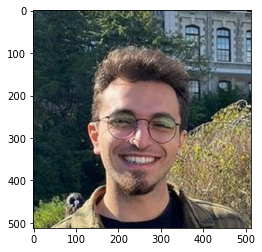

In [50]:
final_image = image.copy()
plt.imshow(final_image);

In [51]:
# Adding a noise to each channels of the original photo 

for i in range(0,3):
    final_image[:, :, i] = final_image[:,:,i] + np.random.uniform( low = 0, high = 0.1 * np.max(image))

- Noisy Photo 

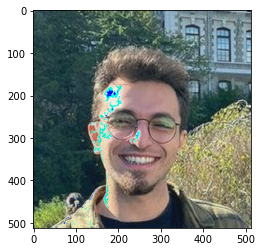

In [52]:
plt.imshow(final_image);

- Splitting the layerss after adding noise

In [53]:
r = final_image.copy()
# set green and blue channels to 0
r[:, :, 1] = 0
r[:, :, 2] = 0


g = final_image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

b = final_image.copy()
# set red and green channels to 0
b[:, :, 0] = 0
b[:, :, 1] = 0

- Noisy Photo Layers

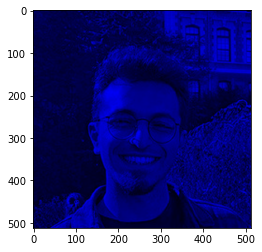

In [54]:
plt.imshow(b);

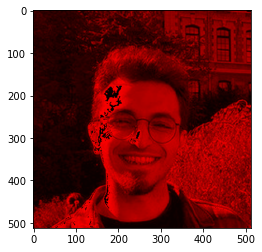

In [55]:
plt.imshow(r);

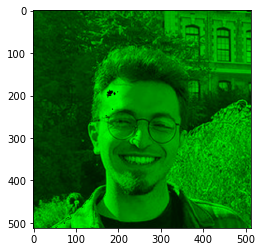

In [56]:
plt.imshow(g);